<a href="https://colab.research.google.com/github/fedecicco/projects/blob/main/progetto_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Descrizione del Dataset
Il dataset a disposizione contiene le seguenti informazioni:

- CUST_ID: Identificativo univoco del titolare della carta di credito (categorico).
- BALANCE: Importo del saldo rimanente sul conto per gli acquisti.
- BALANCE_FREQUENCY: Frequenza di aggiornamento del saldo, con un punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
- PURCHASES: Quantità totale degli acquisti effettuati dal conto.
- ONEOFF_PURCHASES: Importo massimo degli acquisti effettuati in un'unica soluzione.
- INSTALLMENTS_PURCHASES: Importo degli acquisti effettuati a rate.
- CASH_ADVANCE: Anticipo in contanti dato dall'utente.
- PURCHASES_FREQUENCY: Frequenza degli acquisti, con un punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
- ONEOFFPURCHASESFREQUENCY: Frequenza con cui vengono effettuati acquisti in un'unica soluzione (1 = frequenti, 0 = non frequenti).
- PURCHASESINSTALLMENTSFREQUENCY: Frequenza con cui vengono effettuati acquisti a rate (1 = frequenti, 0 = non frequenti).
- CASHADVANCEFREQUENCY: Frequenza con cui viene richiesto l'anticipo in contanti.
- CASHADVANCETRX: Numero di transazioni effettuate con anticipo in contanti.
- PURCHASES_TRX: Numero totale di transazioni di acquisto effettuate.
- CREDIT_LIMIT: Limite massimo della carta di credito per ciascun utente.
- PAYMENTS: Importo totale dei pagamenti effettuati dall'utente.
- MINIMUM_PAYMENTS: Importo minimo dei pagamenti effettuati dall'utente.
- PRCFULLPAYMENT: Percentuale del pagamento completo pagato dall'utente.
- TENURE: Durata del servizio di carta di credito per l'utente (in anni).


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
frequency_columns = [col for col in df.columns if 'frequency' in col.lower()]

# Creazione della maschera per filtrare le righe
mask = (df[frequency_columns] <= 1).all(axis=1)

# Filtraggio del DataFrame
df = df[mask]

sono state eliminati tutti gli outlier delle colonne contenenti frequenze, i valori non possono andare oltre 1

In [ ]:
df = df.drop("CUST_ID", axis=1)

è stata eliminata la colonna CUST_ID poichè non significativa ai fini del clustering

In [ ]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


MINIMUM_PAYMENTS contiene un gran numero di valori nulli, questi verranno sostituiti con la media della colonna stessa

In [ ]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
# @title Feature engineering
#CASH_ADVANCE_PER_TRX: calcola quanto, in media, l'utente ha prelevato in contante per ogni transazione di anticipo
df["CASH_ADVANCE_PER_TRX"] = df["CASH_ADVANCE"]/df["CASH_ADVANCE_TRX"]
#UTILIZATION_RATIO è un indicatore della percentuale di utilizzo del limite di credito disponibile.
#Un valore più alto può suggerire un comportamento di spesa più elevato
df["UTILIZATION_RATIO"] = df["BALANCE"]/df["CREDIT_LIMIT"]

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_PER_TRX,UTILIZATION_RATIO
count,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,4313.000000,8941.000000
mean,1561.845414,0.877259,1004.083438,592.902497,411.481425,976.518276,0.490713,0.202530,0.364804,0.134194,3.235209,14.722962,4492.308258,1733.677679,864.176112,0.153869,11.521306,433.045811,0.388643
std,2079.718985,0.236879,2137.526323,1660.653167,904.699100,2095.839076,0.401385,0.298444,0.397479,0.197669,6.809507,24.866639,3638.446283,2896.003290,2331.686289,0.292606,1.331900,705.934860,0.389767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,14.222216,0.000000
25%,128.175207,0.888889,39.830000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.273938,170.786793,0.000000,12.000000,114.462798,0.041439
50%,871.499977,1.000000,362.480000,38.000000,89.580000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.533676,334.618726,0.000000,12.000000,257.390085,0.302311
75%,2046.727519,1.000000,1111.120000,578.660000,469.140000,1112.247446,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1903.279643,864.081082,0.142857,12.000000,478.933445,0.717539
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,14836.451410,15.909951


In [ ]:
ss = StandardScaler() # standardizzazione del dataset
X = ss.fit_transform(df)

In [ ]:
X

array([[-0.7313631 , -0.24941178, -0.4251336 , ...,  0.35942659,
                nan, -0.89222944],
       [ 0.78891128,  0.13438841, -0.46976712, ...,  0.35942659,
         1.6684643 ,  0.17665931],
       [ 0.44878931,  0.51818859, -0.10803439, ...,  0.35942659,
                nan, -0.14357229],
       ...,
       [-0.73977917, -0.18544719, -0.40220862, ..., -4.14566662,
                nan, -0.93713587],
       [-0.74455946, -0.18544719, -0.46976712, ..., -4.14566662,
        -0.58761018, -0.92811343],
       [-0.57180987, -0.88907875,  0.04171717, ..., -4.14566662,
        -0.52351665, -0.20026686]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_ # circa il 55% della varianza spiegata, se si vuole un valore del 70% basta utilizzare 5 componenti

array([0.27286402, 0.20304728, 0.08796883])

In [ ]:
ssd = {}

for k in range(1,9):
  kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 1)
  kmeans.fit(X_pca)
  ssd[k] = kmeans.inertia_

ssd

{1: 85708.0886064467,
 2: 62911.21897966558,
 3: 47308.778548187554,
 4: 34587.46867094616,
 5: 30779.127015109952,
 6: 24773.347721377195,
 7: 22066.95027918634,
 8: 20435.382986141867}

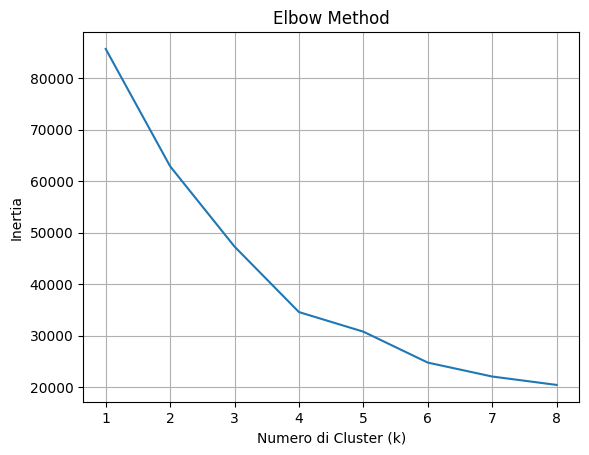

In [ ]:
plt.title('Elbow Method')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.grid()
plt.plot(ssd.keys(),ssd.values())

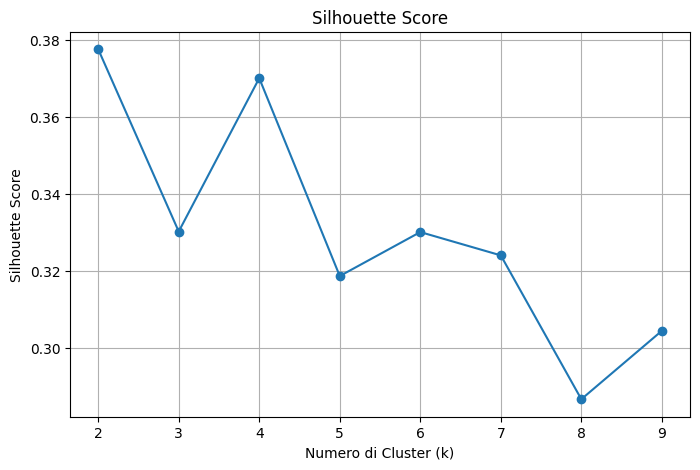

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_range = range(2, 10)  # Testa per k da 2 a 10

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init="k-means++" ,random_state=1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Grafico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

**CONSIDERAZIONI**:
L'elbow method suggerisce di utilizzare 4 cluster, in quanto oltre il cluster 4 non si ha un miglioramento significativo dell'inertia. Il silhouette score ha un punteggio massimo con 2 cluster ma questi potrebbero non essere sufficienti per catturare la complessità della distribuzione dei dati, il secondo punteggio migliore è ottenuto con 4 cluster, in accordo con l'elbow method

In [ ]:
Kmeans = KMeans(n_clusters = 4, init = "k-means++")
Kmeans.fit(X_pca)

y_pred = Kmeans.predict(X_pca)

df["cluster"] = y_pred

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_PER_TRX,UTILIZATION_RATIO,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,0.040901,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1610.736371,0.457495,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,0.332687,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.081082,0.000000,12,205.788017,0.222223,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,0.681429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN,0.028494,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.081082,0.000000,6,NaN,0.019183,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN,0.023399,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,18.279389,0.026915,1


## ANALISI DELLE SPESE

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='BALANCE', y='ONEOFF_PURCHASES', z='INSTALLMENTS_PURCHASES', color=y_pred,
                    title="Spese medie 3D",
                    labels={"BALANCE": "Balance", "ONEOFF_PURCHASES": "One-off Purchases", "INSTALLMENTS_PURCHASES": "Installments Purchases"})

fig.update_traces(marker=dict(size=5))

fig.show()

In [ ]:
min = df[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","cluster"]].groupby("cluster").min()
min

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
cluster,,,
0,78.114579,0.0,0.0
1,0.000000,0.0,0.0
2,21.311946,0.0,0.0
3,0.000000,0.0,0.0


In [ ]:
max = df[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","cluster"]].groupby("cluster").max()
max

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
cluster,,,
0,16304.889250,4139.56,4059.93
1,6619.148640,4900.00,1859.34
2,19043.138560,40761.25,22500.00
3,9502.256762,6520.00,4538.84


In [ ]:
df[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","cluster"]].groupby("cluster").median()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
cluster,,,
0,4183.877488,0.00,0.00
1,650.025961,0.00,0.00
2,2320.309453,3684.52,1669.81
3,381.627688,171.60,460.52


**Cluster 0**:

BALANCE: Presenta un saldo medio/mediano elevato (mediana di 4183.88), con un range che va da un minimo di 78.11 a un massimo di 16304.89. Questo suggerisce che questo cluster contiene clienti con un debito residuo sulla carta di credito relativamente alto.

ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: La mediana per entrambi è 0, il che indica che la maggior parte dei clienti in questo cluster non effettua acquisti né in un'unica soluzione né a rate, o lo fa in misura molto limitata.

Descrizione: **Clienti con alto saldo  e bassa propensione all'acquisto, sia in un'unica soluzione che a rate. Potrebbero essere clienti che utilizzano la carta principalmente per altre funzioni (es. prelievi)**

**Cluster 1**:

BALANCE: Presenta un saldo medio/mediano basso (mediana di 650.03), con un range che va da 0 a 6619.15. Questo indica un debito residuo generalmente contenuto.

ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: Anche qui, la mediana per entrambi è 0, suggerendo una bassa attività di acquisto.

Descrizione: **Simile al cluster 0 per la bassa attività di acquisto, ma con un saldo residuo significativamente inferiore. Potrebbero essere clienti che usano la carta occasionalmente o che la mantengono con un basso utilizzo.**

**Cluster 2**:

BALANCE: Presenta un saldo mediano di 2320.31, intermedio rispetto agli altri cluster, con un range che va da 21.31 a ben 19043.14.

ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: A differenza degli altri due cluster, qui si osserva una mediana significativa sia per gli acquisti in un'unica soluzione (3684.52) che per quelli a rate (1669.81). I massimi per queste due variabili sono anche i più alti tra tutti i cluster (40761.25 e 22500 rispettivamente).

Descrizione: **Questo cluster sembra rappresentare i clienti più attivi negli acquisti, sia in un'unica soluzione che a rate, con un saldo residuo moderato. Sono i clienti che utilizzano maggiormente la carta di credito per lo scopo principale: fare acquisti.**

**Cluster 3**:

BALANCE: Presenta un saldo mediano molto basso (381.63), con un range che va da 0 a 9502.26.

ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: Mostra una mediana di 171.60 per gli acquisti in un'unica soluzione e 460.52 per quelli a rate.

Descrizione: **Clienti con un basso saldo e una moderata attività di acquisto, prevalentemente a rate. Potrebbero essere clienti che preferiscono dilazionare i pagamenti.**


## ABITUDINI DI PAGAMENTO



<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='PRC_FULL_PAYMENT'>

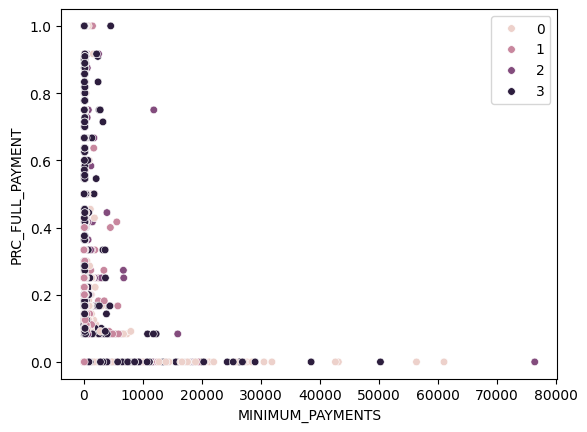

In [ ]:
sns.scatterplot(x = df["MINIMUM_PAYMENTS"], y = df["PRC_FULL_PAYMENT"], hue = y_pred, s=30)

In [ ]:
df[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","cluster"]].groupby("cluster").median()

,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
cluster,,
0,1307.447265,0.000000
1,285.649878,0.000000
2,678.731919,0.083333
3,204.442058,0.000000


In [ ]:
df[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","cluster"]].groupby("cluster").min()

,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
cluster,,
0,16.950090,0.0
1,0.019163,0.0
2,53.628070,0.0
3,0.261984,0.0


In [ ]:
df[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","cluster"]].groupby("cluster").max()

,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
cluster,,
0,61031.61860,1.0
1,19443.45352,1.0
2,76406.20752,1.0
3,50260.75947,1.0


Cluster 0: Clienti con pagamenti minimi mediamente alti e una percentuale di pagamento completo pari a zero. Questo significa che questi clienti pagano l'importo minimo richiesto, ma non saldano mai l'intero debito.

Cluster 1: Clienti con pagamenti minimi bassi e una percentuale di pagamento completo pari a zero. Anche in questo caso, i clienti pagano solo l'importo minimo e non saldano mai il debito per intero.

Cluster 2: Clienti con pagamenti minimi di valore intermedio rispetto agli altri cluster e una percentuale di pagamento completo che è maggiore di zero, ma comunque molto bassa. Questo indica che alcuni clienti di questo gruppo occasionalmente pagano più del minimo, ma la maggior parte continua a non saldare l'intero importo.

Cluster 3: Clienti con pagamenti minimi bassi e una percentuale di pagamento completo pari a zero. Come per il Cluster 1, questi clienti pagano solo l'importo minimo.

# Frequenza di utilizzo della carta

<Axes: xlabel='CASH_ADVANCE', ylabel='PURCHASES_FREQUENCY'>

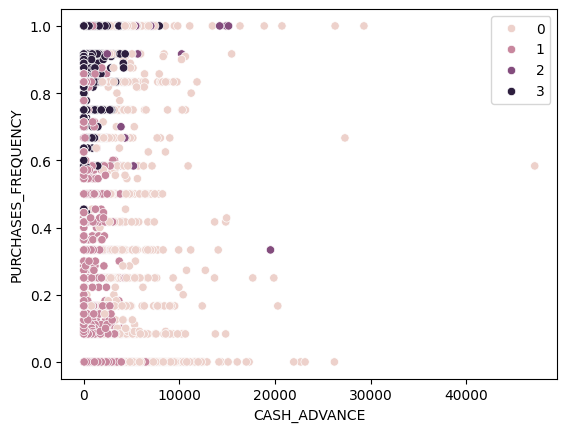

In [ ]:
sns.scatterplot(x = df["CASH_ADVANCE"], y = df["PURCHASES_FREQUENCY"], hue = y_pred)

In [ ]:
df[["CASH_ADVANCE","PURCHASES_FREQUENCY","cluster"]].groupby("cluster").min()

,CASH_ADVANCE,PURCHASES_FREQUENCY
cluster,,
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.166667
3,0.0,0.166667


In [ ]:
df[["CASH_ADVANCE","PURCHASES_FREQUENCY","cluster"]].groupby("cluster").max()

,CASH_ADVANCE,PURCHASES_FREQUENCY
cluster,,
0,47137.211760,1.0
1,6897.966615,1.0
2,19513.474830,1.0
3,7894.578816,1.0


In [ ]:
df[["CASH_ADVANCE","PURCHASES_FREQUENCY","cluster"]].groupby("cluster").median()

,CASH_ADVANCE,PURCHASES_FREQUENCY
cluster,,
0,3501.657389,0.083333
1,98.119478,0.083333
2,0.000000,1.000000
3,0.000000,1.000000


Cluster 0: Clienti con un uso significativo dell'anticipo contanti e una bassa frequenza di acquisto.

Cluster 1: Clienti con un uso limitato dell'anticipo contanti e una bassa frequenza di acquisto.

Cluster 2: Clienti che tipicamente non usano l'anticipo contanti e che effettuano acquisti con alta frequenza.

Cluster 3: Clienti che tipicamente non usano l'anticipo contanti e che effettuano acquisti con alta frequenza.

In [ ]:
df['cluster'].value_counts()

,count
cluster,
1,3968
3,3279
0,1261
2,433


# STRATEGIE MARKETING PER CLUSTER
- **Cluster 0**(alto saldo, bassa attività di acquisto): offrire tassi di interesse favorevoli e incentivi per il pagamento anticipato. Si potrebbero anche proporre condizioni vantaggiose per prelievi di contante, promuovendo un uso più diversificato della carta.

- **Cluster 1**(saldo basso, bassa attività di acquisto): Qui l'obiettivo è stimolare un maggiore utilizzo della carta, con promozioni come cashback e sconti per acquisti frequenti. Comunicazioni personalizzate potrebbero suggerire prodotti da acquistare, creando un'esperienza più conveniente.

- **Cluster 2**: (saldo medio/alto, alta attività di acquisto): Per questo gruppo, l'idea è fidelizzare i clienti premiando gli acquisti frequenti con punti o vantaggi esclusivi. Le offerte personalizzate basate sugli acquisti precedenti, e promozioni su acquisti rateizzati o in un'unica soluzione, potrebbero aumentare ulteriormente la spesa.

- **Cluster 3**: (basso saldo residuo, acquisti moderati a rate): La strategia dovrebbe incentivare ulteriormente l'uso delle rate, proponendo tassi di interesse ridotti e premi per chi usa frequentemente il pagamento rateizzato. Offrire opzioni di pagamento più flessibili potrebbe migliorare l'esperienza d'acquisto.